In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
df = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Auto.data", 
                 sep=r"\s+")

In [6]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null float64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


In [12]:
np.unique(df["year"])

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

# Visualization for a single continuous variable

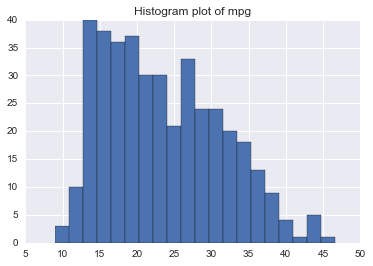

In [24]:
plt.hist(df["mpg"], bins = 20)
plt.title("Histogram plot of mpg")

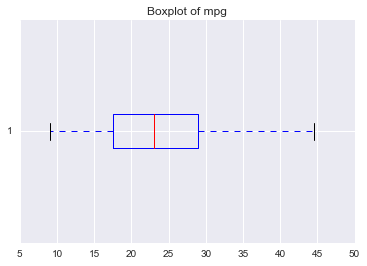

In [27]:
plt.boxplot(df["mpg"], vert=False)
plt.title("Boxplot of mpg")

In [22]:
df.query("mpg < 40 and mpg > 35").shape[0]

25

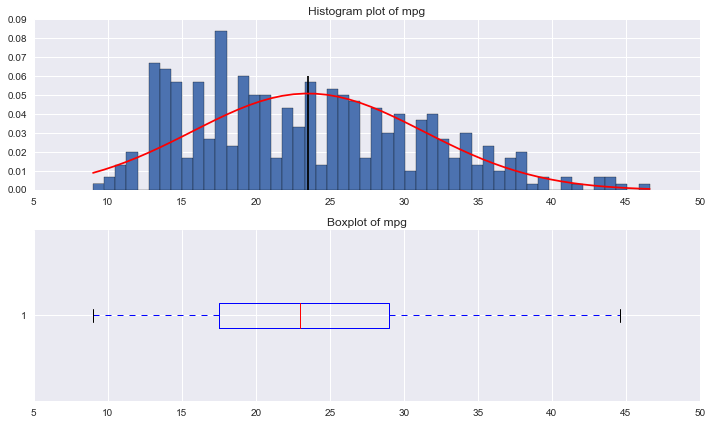

In [49]:
plt.figure(figsize = (10, 6))
plt.subplot(2, 1, 1)
n, bins, patches = plt.hist(df["mpg"], bins = 50, normed = True)
plt.title("Histogram plot of mpg")

pdf = normpdf(bins, df["mpg"].mean(), df["mpg"].std())
plt.plot(bins, pdf, ls = "-", color = "red")

plt.vlines([df["mpg"].mean()], ymin=0, ymax=0.06)

plt.subplot(2, 1, 2)
plt.boxplot(df["mpg"], vert=False)
plt.title("Boxplot of mpg")
plt.tight_layout()

In [31]:
from matplotlib.mlab import normpdf

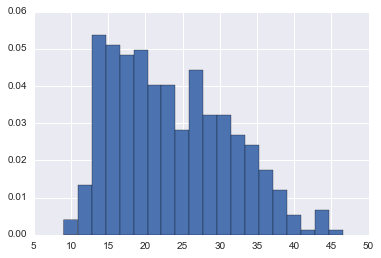

In [35]:
n, bins, patches = plt.hist(df["mpg"], bins = 20, normed = True)

In [36]:
bins

array([  9.  ,  10.88,  12.76,  14.64,  16.52,  18.4 ,  20.28,  22.16,
        24.04,  25.92,  27.8 ,  29.68,  31.56,  33.44,  35.32,  37.2 ,
        39.08,  40.96,  42.84,  44.72,  46.6 ])

In [41]:
normpdf(bins, df["mpg"].mean(), df["mpg"].std())

array([ 0.00912588,  0.01384406,  0.01982389,  0.02679481,  0.03418606,
        0.04117028,  0.046801  ,  0.0502184 ,  0.0508636 ,  0.04862815,
        0.04388387,  0.03738166,  0.03005722,  0.02281263,  0.01634325,
        0.01105193,  0.00705463,  0.00425056,  0.00241744,  0.00129778,
        0.00065763])

In [51]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
14,24.0,4,113.0,95.00,2372.0,15.0,70,3,toyota corona mark ii
39,14.0,8,400.0,175.0,4464.0,11.5,71,1,pontiac catalina brougham
74,13.0,8,302.0,140.0,4294.0,16.0,72,1,ford gran torino (sw)
155,15.0,6,250.0,72.00,3158.0,19.5,75,1,ford maverick
200,18.0,6,250.0,78.00,3574.0,21.0,76,1,ford granada ghia
341,23.5,6,173.0,110.0,2725.0,12.6,81,1,chevrolet citation
250,19.4,8,318.0,140.0,3735.0,13.2,78,1,dodge diplomat
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
138,14.0,8,318.0,150.0,4457.0,13.5,74,1,dodge coronet custom (sw)
345,35.1,4,81.0,60.00,1760.0,16.1,81,3,honda civic 1300


In [58]:
counts = df["year"].value_counts()

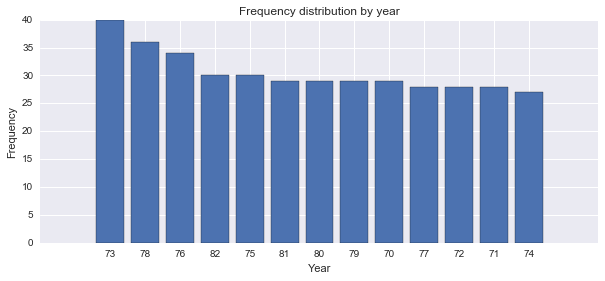

In [66]:
plt.figure(figsize = (10, 4))
plt.bar(range(len(counts)), counts, align = "center")
plt.xticks(range(len(counts)), counts.index)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Frequency distribution by year")

In [71]:
mpg_by_year = df.groupby("year")["mpg"].\
agg([np.median, np.std]).reset_index()

mpg_by_year

,year,median,std
0,70,16.00,5.339231
1,71,19.00,6.591942
2,72,18.50,5.435529
3,73,16.00,4.700245
4,74,24.00,6.420010
5,75,19.50,4.940566
6,76,21.00,5.889297
7,77,21.75,6.675862
8,78,20.70,6.898044
9,79,23.90,6.794217


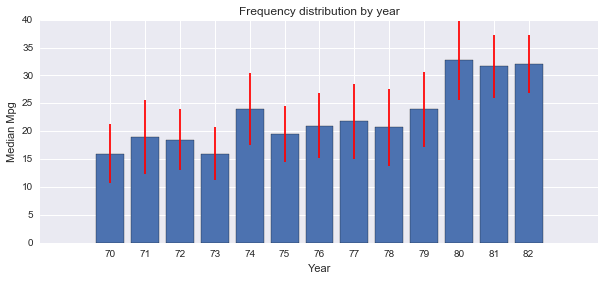

In [76]:
plt.figure(figsize = (10, 4))
plt.bar(range(mpg_by_year.shape[0]), mpg_by_year["median"],
        align = "center", yerr = mpg_by_year["std"], ecolor = "red")
plt.xticks(range(mpg_by_year.shape[0]), mpg_by_year["year"])
plt.xlabel("Year")
plt.ylabel("Median Mpg")
plt.title("Frequency distribution by year")